In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from PIL import ImageOps
from tqdm import tqdm_notebook
from io import BytesIO
import glob
import requests
import numpy as np
import pandas as pd

In [2]:
photos_df = '/run/media/twoaday/data-storag/data-sets/where2buyit/photos.txt'
photos_df = pd.read_csv(photos_df, error_bad_lines=False, header=None)
photos_df.columns = ['photo_id', 'url']

b'Skipping line 113440: expected 2 fields, saw 3\nSkipping line 113441: expected 2 fields, saw 3\nSkipping line 113442: expected 2 fields, saw 3\nSkipping line 113443: expected 2 fields, saw 3\nSkipping line 113444: expected 2 fields, saw 3\nSkipping line 113445: expected 2 fields, saw 3\nSkipping line 113446: expected 2 fields, saw 3\nSkipping line 113447: expected 2 fields, saw 3\nSkipping line 113448: expected 2 fields, saw 3\nSkipping line 113449: expected 2 fields, saw 3\nSkipping line 113450: expected 2 fields, saw 3\nSkipping line 113451: expected 2 fields, saw 3\nSkipping line 113452: expected 2 fields, saw 3\nSkipping line 113453: expected 2 fields, saw 3\nSkipping line 113454: expected 2 fields, saw 3\nSkipping line 113455: expected 2 fields, saw 3\nSkipping line 113456: expected 2 fields, saw 3\nSkipping line 113457: expected 2 fields, saw 3\nSkipping line 113458: expected 2 fields, saw 3\nSkipping line 113459: expected 2 fields, saw 3\nSkipping line 113460: expected 2 field

b'Skipping line 325411: expected 2 fields, saw 3\nSkipping line 325439: expected 2 fields, saw 3\nSkipping line 325445: expected 2 fields, saw 3\nSkipping line 325448: expected 2 fields, saw 3\nSkipping line 325459: expected 2 fields, saw 3\nSkipping line 325461: expected 2 fields, saw 3\nSkipping line 325481: expected 2 fields, saw 3\nSkipping line 325491: expected 2 fields, saw 3\nSkipping line 325495: expected 2 fields, saw 3\nSkipping line 325525: expected 2 fields, saw 3\nSkipping line 325526: expected 2 fields, saw 3\nSkipping line 325532: expected 2 fields, saw 3\nSkipping line 325534: expected 2 fields, saw 3\nSkipping line 325535: expected 2 fields, saw 3\nSkipping line 325547: expected 2 fields, saw 3\nSkipping line 325548: expected 2 fields, saw 3\nSkipping line 325550: expected 2 fields, saw 3\nSkipping line 325577: expected 2 fields, saw 3\nSkipping line 325579: expected 2 fields, saw 3\nSkipping line 325586: expected 2 fields, saw 3\nSkipping line 325587: expected 2 field

In [3]:
photos_df.count()

photo_id    407963
url         407963
dtype: int64

In [4]:
df_bags = '/run/media/twoaday/data-storag/data-sets/where2buyit/meta/json/retrieval_bags.json'
df_bags = pd.read_json(df_bags)

In [5]:
df_bags.head()

,photo,product
0,75161,1
1,75162,1
2,249331,2
3,206867,3
4,371076,4


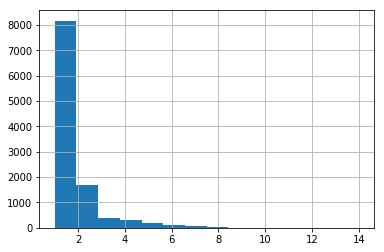

In [6]:
df_bags.groupby('product').count().photo.hist(bins=14)

In [7]:
df_bags_pairs = '/run/media/twoaday/data-storag/data-sets/where2buyit/meta/json/test_pairs_bags.json'
df_bags_pairs = pd.read_json(df_bags_pairs)

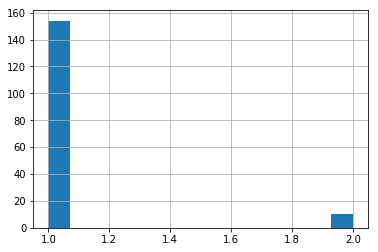

In [8]:
df_bags_pairs.groupby('photo').count().bbox.hist(bins=14)

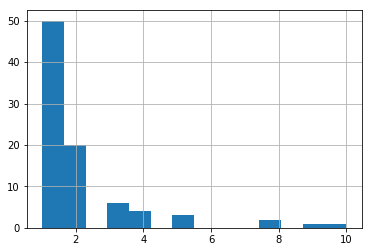

In [9]:
df_bags_pairs.groupby('product').count().photo.hist(bins=14)

In [10]:
df_bags_pairs.head()

,bbox,photo,product
0,"{'width': 120, 'top': 172, 'height': 358, 'lef...",4534,7419
1,"{'width': 120, 'top': 184, 'height': 303, 'lef...",16159,9946
2,"{'width': 57, 'top': 310, 'height': 88, 'left'...",6538,10777
3,"{'width': 241, 'top': 516, 'height': 300, 'lef...",9473,7862
4,"{'width': 258, 'top': 498, 'height': 641, 'lef...",8489,10610


In [11]:
def show_img_with_plot(img_id, bbox):
    
    img = requests.get(photos_df.loc[photos_df.photo_id == img_id].url.values[0]).content
    img = Image.open(BytesIO(img))
    im = np.array(img, dtype=np.uint8)
    print(img_id)
    print(im.shape)
    print(bbox)
    # Create figure and axes
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(im)
    # Create a Rectangle patch
    rect = patches.Rectangle((bbox['left'], bbox['top']),
                             bbox['width'],
                             bbox['height'],
                             linewidth=3,
                             edgecolor='g',
                             facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.show()

In [12]:
def show_img(img_id):
    img = requests.get(photos_df.loc[photos_df.photo_id == img_id].url.values[0]).content
    img = Image.open(BytesIO(img))
    im = np.array(img, dtype=np.uint8)
    # Create figure and axes
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(im)
    plt.show()

1932
(660, 462, 3)
{'width': 176, 'top': 99, 'height': 284, 'left': 201}


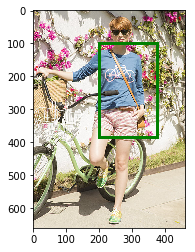

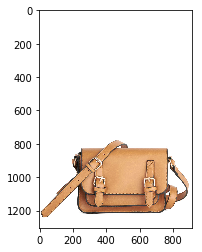

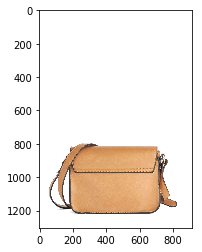

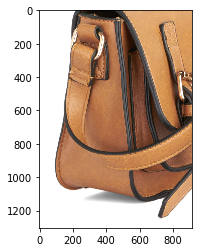

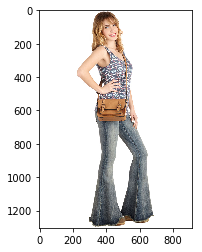

In [13]:
sample = df_bags_pairs.sample(1)
sample = sample[['bbox', 'photo', 'product']].values[0]
show_img_with_plot(sample[1], sample[0])
for img_id in df_bags.loc[df_bags['product'] == sample[2]].photo.values:
    show_img(img_id)

In [14]:
pair_file_list = glob.glob("/run/media/twoaday/data-storag/data-sets/where2buyit/meta/json/*.json")
pair_file_list = [p for p in pair_file_list if '_pairs_' in p]
pair_file_list = [p for p in pair_file_list if 'train_' in p]
total_num_of_photos = 0
for p in pair_file_list:
    total_num_of_photos += pd.read_json(p).groupby('product').count().photo.sum()
total_num_of_photos

30629

In [15]:
pair_file_list

['/run/media/twoaday/data-storag/data-sets/where2buyit/meta/json/train_pairs_bags.json',
 '/run/media/twoaday/data-storag/data-sets/where2buyit/meta/json/train_pairs_belts.json',
 '/run/media/twoaday/data-storag/data-sets/where2buyit/meta/json/train_pairs_dresses.json',
 '/run/media/twoaday/data-storag/data-sets/where2buyit/meta/json/train_pairs_eyewear.json',
 '/run/media/twoaday/data-storag/data-sets/where2buyit/meta/json/train_pairs_footwear.json',
 '/run/media/twoaday/data-storag/data-sets/where2buyit/meta/json/train_pairs_hats.json',
 '/run/media/twoaday/data-storag/data-sets/where2buyit/meta/json/train_pairs_leggings.json',
 '/run/media/twoaday/data-storag/data-sets/where2buyit/meta/json/train_pairs_outerwear.json',
 '/run/media/twoaday/data-storag/data-sets/where2buyit/meta/json/train_pairs_pants.json',
 '/run/media/twoaday/data-storag/data-sets/where2buyit/meta/json/train_pairs_skirts.json',
 '/run/media/twoaday/data-storag/data-sets/where2buyit/meta/json/train_pairs_tops.json'

(2100, 3000) crop: (240, 385, 715, 1850)
(2100, 3000) image cropped to (475, 1465)


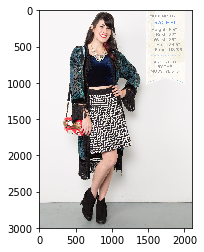

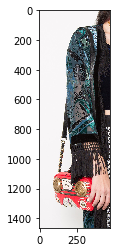

In [16]:
row = [r for _, r in df_bags_pairs.loc[df_bags_pairs.photo == 6749 ].iterrows()][0]

img = requests.get(photos_df.loc[photos_df.photo_id == row['photo']].url.values[0]).content
img = Image.open(BytesIO(img))

bbox = row['bbox']
bbox = (bbox['left'], bbox['top'], bbox['left'] + bbox['width'], bbox['top'] + bbox['height'])
print('{0} crop: {1}'.format(img.size, bbox))
crop = img.crop(bbox)
print('{0} image cropped to {1}'.format(img.size, crop.size))
plt.imshow(img)
plt.show()
plt.imshow(crop)
plt.show()

In [17]:
path = '/run/media/twoaday/data-storag/data-sets/where2buyit/photos'
result = [y for x in os.walk(path) for y in glob.glob(os.path.join(x[0], '*.jpg'))]
df_data_set = []
for file in tqdm_notebook(result, desc = 'Parsing files'):
    s = file.split('/')
    name, product, category = s[-1].replace('.jpg', ''), s[-2], s[-3]
    df_data_set.append([name, product, category, file])
df_data_set = pd.DataFrame(df_data_set)
df_data_set.columns = ['name', 'product', 'category', 'file']

In [18]:
df_data_set.head()

,name,product,category,file
0,query,4940,bags,/run/media/twoaday/data-storag/data-sets/where...
1,46773,4940,bags,/run/media/twoaday/data-storag/data-sets/where...
2,46774,4940,bags,/run/media/twoaday/data-storag/data-sets/where...
3,46775,4940,bags,/run/media/twoaday/data-storag/data-sets/where...
4,query,4519,bags,/run/media/twoaday/data-storag/data-sets/where...


In [19]:
df_data_set.groupby('category').count()[['file']]

,file
category,
bags,600
belts,49
dresses,1864
eyewear,40
footwear,887
hats,171
leggings,345
outerwear,912
pants,376


In [20]:
len(df_data_set) - len(df_data_set.loc[df_data_set.name == 'query'])

5788

In [21]:
queries = df_data_set.loc[df_data_set.name == 'query'].values

In [22]:
len(queries)

1960

In [23]:
queries_dict = {}
for s in queries[:,(1,3)]:
    queries_dict[s[0]] = s[1]
queries_dict

{'4940': '/run/media/twoaday/data-storag/data-sets/where2buyit/photos/bags/4940/query.jpg',
 '4519': '/run/media/twoaday/data-storag/data-sets/where2buyit/photos/bags/4519/query.jpg',
 '7894': '/run/media/twoaday/data-storag/data-sets/where2buyit/photos/bags/7894/query.jpg',
 '1635': '/run/media/twoaday/data-storag/data-sets/where2buyit/photos/bags/1635/query.jpg',
 '6025': '/run/media/twoaday/data-storag/data-sets/where2buyit/photos/bags/6025/query.jpg',
 '5737': '/run/media/twoaday/data-storag/data-sets/where2buyit/photos/bags/5737/query.jpg',
 '10650': '/run/media/twoaday/data-storag/data-sets/where2buyit/photos/bags/10650/query.jpg',
 '7276': '/run/media/twoaday/data-storag/data-sets/where2buyit/photos/bags/7276/query.jpg',
 '9136': '/run/media/twoaday/data-storag/data-sets/where2buyit/photos/bags/9136/query.jpg',
 '6176': '/run/media/twoaday/data-storag/data-sets/where2buyit/photos/bags/6176/query.jpg',
 '2779': '/run/media/twoaday/data-storag/data-sets/where2buyit/photos/bags/277